## Imports

In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import  OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn import compose
from sklearn.model_selection import  train_test_split ,cross_val_predict, StratifiedKFold
from sklearn.metrics import  accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.4.2
Sklearn  1.0.2


## Get the dataset
- **CLOUD = True**: Download dataset from Kaggle. Necesary for cloud enviroments like COLAB. **Specify your [kaggle credentials](https://www.kaggle.com/docs/api)**.
- **CLOUD = False**: Get the dataset from your local machine. **Specify the data path**.

In [2]:
data_test = "test.csv"
data_train="train.csv"

## Load data

In [3]:
df      = pd.read_csv(data_train, index_col='PassengerId')
df_test = pd.read_csv(data_test , index_col='PassengerId')

print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)

Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


In [5]:
# displying the first five row train data 
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


In [6]:
#displying the first five row train data 
df_test.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1134,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,E34,C
1065,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1003,3,"Shine, Miss. Ellen Natalia",female,NaN,0,0,330968,7.7792,NaN,Q
1073,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S


## Check missings

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# Exercise 1 (2pts):
Extract the title (Mr, Mrs, ... ) from the "Name" column.

Tips:
- split(',')[1] to get the 2nd part, and remove the surnamename
- split('.')[0] to get the 1str part, and remove the name

In [9]:
df_test['Name']

PassengerId
892                                 Kelly, Mr. James
893                 Wilkes, Mrs. James (Ellen Needs)
894                        Myles, Mr. Thomas Francis
895                                 Wirz, Mr. Albert
896     Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                     
1305                              Spector, Mr. Woolf
1306                    Oliva y Ocana, Dona. Fermina
1307                    Saether, Mr. Simon Sivertsen
1308                             Ware, Mr. Frederick
1309                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [10]:
# CODE HERE get_Title_from_Name funtion
# Create this function using lambda (not def)

get_Title_from_Name = None

df['Title']= df['Name'].apply(lambda x: x.split(',')[-1].strip().split('.')[0])
df_test['Title']=df_test['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [11]:
assert df['Title'].values[0] == "Mr"
assert df['Title'].values[1] == "Mrs"
assert df['Title'].values[2] == "Miss"

assert df_test['Title'].values[0] == "Mr"
assert df_test['Title'].values[1] == "Mrs"
assert df_test['Title'].values[414] == "Dona"

# Exercise 2 (1pts):
Apply the title_dictionary to get a better information about the title. You have to overwrite the Title variable.

In [12]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [13]:
# Use map to apply the prevous dict

df["Title"] = df["Title"].map(title_dictionary)
df_test["Title"] = df_test["Title"].map(title_dictionary)



In [14]:
assert df['Title'].values[886] == "Officer"
assert df_test['Title'].values[417] == "Master"

# Exercise OPTINAL (0pts):
Try to extract some information from the feature **Ticket**. Search on Internet if that colum has some kind of information.

# Exercise OPTIONAL (0pts):
Try to extract some information from the feature **Cabin**. Search on Internet if that colum has some kind of information.

<AxesSubplot:xlabel='Survived', ylabel='count'>

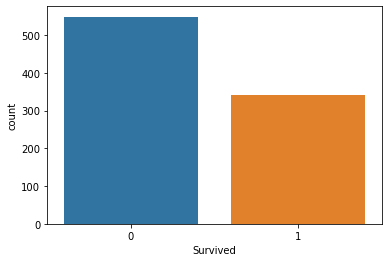

In [16]:
sb.countplot(x ='Survived', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

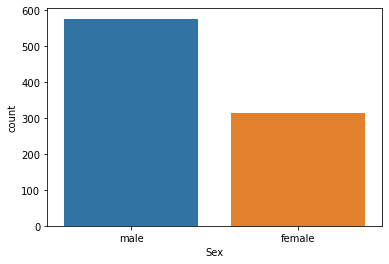

In [17]:
sb.countplot(x ='Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

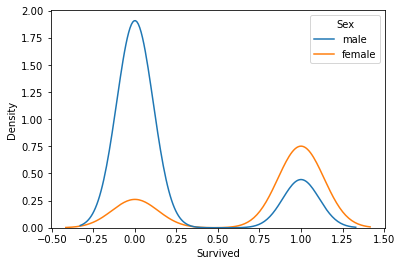

In [18]:
sb.kdeplot(x ='Survived', hue ='Sex', data = df)

# Preprocessing
For X data, notice that...
- We drop Survived because is the target variable
- We drop Name because we have extracted the Title: Mr, Mrs, ...
- We drop Ticket because it has no information -> see df.Ticket.nunique()
- We drop Cabin because it has a lot of missings (77% are missings)

Then, we identify **numerical** variables and **categorical** variables,

In [20]:
x = df.drop(columns=["Survived", 'Name', 'Ticket', 'Cabin']) # X DATA (WILL BE TRAIN+VALID DATA)
y = df["Survived"] # 0 = No, 1 = Yes

x_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin']) # # X_TEST DATA (NEW DATA)

In [21]:
cat_vars  = ['Sex', 'Embarked', 'Title']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age'] # x.select_dtypes(exclude=[object]).columns.values.tolist()

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

Categorical features:
 ['Sex', 'Embarked', 'Title']


# Exercise 3 (2pts):
Create a **ColumnTransformer for Tree Models**. You need to create 2 pipelines (one for numerical and other for categories). Remember:
- Categorical pipeline: Some SimpleImputer -> Some Encoder
- Numerical pipeline: Some SimpleImputer -> NO Encoder

In [23]:
"""
num_preprocessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
])

cat_preporcessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
  # Some Encoder here. Remember to handle_unknown
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_preprocessing, num_vars),
    ('cat', cat_preporcessing, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro
"""
num_4_treeModels = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))
  ])

cat_4_treeModels= Pipeline(steps=[
  ('imputer,', SimpleImputer( strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
  ])
  
tree_prepro = compose.ColumnTransformer(transformers=[
  ('num', num_4_treeModels, num_vars),
  ('cat', cat_4_treeModels, cat_vars),
  ], remainder='drop') 
tree_prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer,',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Sex', 'Embarked', 'Title'])])

In [24]:
assert type(tree_prepro)      is compose._column_transformer.ColumnTransformer
assert type(num_4_treeModels) is pipeline.Pipeline
assert type(cat_4_treeModels) is pipeline.Pipeline
assert len(num_4_treeModels) == 1
assert len(cat_4_treeModels) == 2

# Exercise 4 (1pts):
1. Complete the diccionary with some Tree Models.
2. Then we put each model in a Pipeline where:
   - first is the prepocessing with the column Transformer
   - Then is the Tree model
3. Display the fullpipeline of the LGBMClassifier

In [25]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [33]:
"""
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":
  "Random Forest":
  "AdaBoost":
  "Skl GBM":
  "Skl HistGBM":
  "XGBoost":
  "LightGBM":
  "CatBoost":
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]
"""

tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(random_state=0),
  "Extra Trees":   ExtraTreesClassifier(random_state=0),
  "Random Forest": RandomForestClassifier(random_state=0),
  "AdaBoost":      AdaBoostClassifier(random_state=0),
  "Skl GBM":       GradientBoostingClassifier(random_state=0),
  "Skl HistGBM":   HistGradientBoostingClassifier(random_state=0),
  "XGBoost":       XGBClassifier(),
  "LightGBM":      LGBMClassifier(random_state=0),
  "CatBoost":      CatBoostClassifier(n_estimators=100, allow_writing_files=False)
}

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer,',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=0))])

In [34]:
for pipe in tree_classifiers.values():
    assert type(pipe) is pipeline.Pipeline

# Exercise 5 (3pts):
Define a simple split validation strategy with:
- 80% for train
- 20% for validation
- With stratification
- random_state=0

And train all the models in a for loop

In [36]:
"""
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    # CODE HERE
)
"""



"""
for model_name, model in tree_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    
    # GET PREDICTIONS USING x_val
    pred = # CODE HERE

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
"""

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

x_train, x_val, y_train, y_val = train_test_split(x, y,random_state=0,test_size=0.2,stratify=y)

for model_name, model in tree_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train, y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_val, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)



results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Mod

[14:48:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


Learning rate set to 0.073611
0:	learn: 0.6697764	total: 772us	remaining: 76.5ms
1:	learn: 0.6474842	total: 4.14ms	remaining: 203ms
2:	learn: 0.6245925	total: 6.35ms	remaining: 205ms
3:	learn: 0.6066976	total: 7.74ms	remaining: 186ms
4:	learn: 0.5885005	total: 9.72ms	remaining: 185ms
5:	learn: 0.5692612	total: 11.6ms	remaining: 181ms
6:	learn: 0.5518641	total: 13.4ms	remaining: 178ms
7:	learn: 0.5400106	total: 14.3ms	remaining: 164ms
8:	learn: 0.5291489	total: 16.1ms	remaining: 163ms
9:	learn: 0.5168226	total: 19.5ms	remaining: 176ms
10:	learn: 0.5079485	total: 20.9ms	remaining: 169ms
11:	learn: 0.4973150	total: 22.9ms	remaining: 168ms
12:	learn: 0.4885713	total: 24.6ms	remaining: 164ms
13:	learn: 0.4794433	total: 26.5ms	remaining: 163ms
14:	learn: 0.4718792	total: 28.6ms	remaining: 162ms
15:	learn: 0.4643326	total: 30.4ms	remaining: 160ms
16:	learn: 0.4578323	total: 33.2ms	remaining: 162ms
17:	learn: 0.4514962	total: 35.6ms	remaining: 162ms
18:	learn: 0.4469119	total: 37.4ms	remaining

C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3104257774.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,84.916201,82.595520,0.454782
2,XGBoost,81.564246,78.787879,0.299710
3,Skl HistGBM,81.005587,78.603426,1.641027
4,LightGBM,81.005587,78.333333,0.422868
5,AdaBoost,79.888268,77.964427,0.442330
6,CatBoost,79.888268,76.884058,0.363354
7,Random Forest,78.212291,75.520422,0.599434
8,Extra Trees,77.653631,75.065876,0.730047
9,Decision Tree,77.094972,75.421607,0.061347


In [37]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 75
assert len(results_ord) == 9

# Exercise 6 (3pts):
Define a 10 Fold cross validation strategy with:
- With stratification
- shuffle=True
- random_state=0

And train all the models in a for loop.

Tip you can use **[cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)** for both training and predict with 

In [38]:
"""
skf = model_selection.StratifiedKFold(
    # CODE HERE
)
"""



results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

"""
for model_name, model in tree_classifiers.items():
    start_time = time.time()
        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = # CODE HERE

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
"""

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)



for model_name, model in tree_classifiers.items():

    start_time = time.time()
    pred = cross_val_predict(model, x, y, cv=skf)
    total_time = time.time() - start_time
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Mod

[14:49:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


Learning rate set to 0.077408
0:	learn: 0.6700140	total: 778us	remaining: 77.1ms
1:	learn: 0.6454774	total: 2.94ms	remaining: 144ms
2:	learn: 0.6279862	total: 3.56ms	remaining: 115ms
3:	learn: 0.6065669	total: 6.54ms	remaining: 157ms
4:	learn: 0.5901851	total: 9.34ms	remaining: 177ms
5:	learn: 0.5718778	total: 10.9ms	remaining: 171ms
6:	learn: 0.5565929	total: 12.8ms	remaining: 170ms
7:	learn: 0.5424763	total: 14.5ms	remaining: 167ms
8:	learn: 0.5295636	total: 17.3ms	remaining: 175ms
9:	learn: 0.5187054	total: 19.6ms	remaining: 176ms
10:	learn: 0.5088625	total: 22.3ms	remaining: 181ms
11:	learn: 0.4982348	total: 24.1ms	remaining: 177ms
12:	learn: 0.4892441	total: 27.4ms	remaining: 183ms
13:	learn: 0.4842860	total: 28.5ms	remaining: 175ms
14:	learn: 0.4766014	total: 30.4ms	remaining: 172ms
15:	learn: 0.4695869	total: 32.1ms	remaining: 169ms
16:	learn: 0.4626513	total: 33.8ms	remaining: 165ms
17:	learn: 0.4577616	total: 36.7ms	remaining: 167ms
18:	learn: 0.4533161	total: 38.7ms	remaining

C:\Users\KINGSLEY\AppData\Local\Temp\ipykernel_2024\3085189844.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,83.277217,81.027706,7.322159
2,Skl HistGBM,82.491582,80.831176,15.536268
3,LightGBM,82.491582,80.886300,2.452996
4,CatBoost,82.379349,79.968364,3.106090
5,XGBoost,81.930415,80.430927,2.916713
6,Random Forest,81.369248,79.920429,11.203857
7,AdaBoost,81.144781,79.903653,7.946059
8,Extra Trees,80.695847,79.153485,8.185668
9,Decision Tree,79.124579,77.823315,0.965300


In [39]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 75
assert len(results_ord) == 9

# Exercise 7.1
Train with all data the best model

In [40]:
# best_model = tree_classifiers["SELECT MY BEST MODEL HERE"]
best_model = tree_classifiers["Skl GBM"]

# Fit best model with all data
best_model.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer,',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

# Exercise 7.2 (2pts)
With your best model, generate the predicitions for test data (x_test)

In [41]:
# test_pred = # Get the predictions for x_test

test_pred = best_model.predict(x_test)

In [42]:
assert len(test_pred) == 418
assert np.unique(test_pred).tolist() == [0,1]

# Exercise 7.3

Submit to kaggle.

- You can use the kaggle command line app. Check https://github.com/Kaggle/kaggle-api

In [45]:
sub_kaggle = pd.DataFrame(test_pred, index=x_test.index, columns=["Survived"])



In [54]:
sub_kaggle.to_csv("sub.csv")

In [55]:
!kaggle competitions submit -c titanic -f sub.csv -m "My submission message"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
